

#**Sentiment Analysis: Optimizing Time Savings and Cost Efficiency in the Film Industry**

## **1.** ***Import necessary libraries***

In [ ]:
# Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk  # Untuk pemrosesan bahasa alami (NLP)
from sklearn.feature_extraction.text import CountVectorizer  # Untuk mengubah teks menjadi representasi numerik dengan Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer  # Untuk menghitung TF-IDF dari teks
from sklearn.preprocessing import LabelBinarizer  # Untuk binarisasi label
from nltk.corpus import stopwords  # Daftar kata umum yang biasanya diabaikan dalam analisis teks
from nltk.stem.porter import PorterStemmer  # Untuk stemming menggunakan algoritma Porter
from wordcloud import WordCloud, STOPWORDS  # Untuk membuat visualisasi kata dari teks
from nltk.stem import WordNetLemmatizer  # Untuk lemmatization menggunakan WordNet
from nltk.tokenize import word_tokenize, sent_tokenize  # Untuk tokenisasi kalimat dan kata
from bs4 import BeautifulSoup  # Untuk parsing HTML dan XML (web scraping)
import spacy  # Library NLP yang cepat dan efisien
import re, string, unicodedata  # Untuk manipulasi string dan normalisasi teks
from nltk.tokenize.toktok import ToktokTokenizer  # Tokenizer yang lebih efisien
from nltk.stem import LancasterStemmer, WordNetLemmatizer  # Alternatif untuk stemming dan lemmatization
from sklearn.linear_model import LogisticRegression, SGDClassifier  # Algoritma regresi logistik dan SGD untuk klasifikasi
from sklearn.naive_bayes import MultinomialNB  # Klasifikasi menggunakan Naive Bayes
from sklearn.svm import SVC  # Support Vector Classifier
from textblob import TextBlob  # Untuk analisis teks dan sentiment analysis
from textblob import Word  # Untuk pemrosesan kata
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Untuk evaluasi model
import time  # Untuk mengukur waktu eksekusi kode

import warnings
warnings.filterwarnings('ignore')  # Mengabaikan peringatan

# Mengatur gaya Visualisasi
sns.set(style='whitegrid')


**Penjelasan**

1. **numpy**: Digunakan untuk manipulasi array dan operasi matematis yang efisien, sering digunakan dalam pengolahan data dan analisis numerik.

2. **pandas**: Digunakan untuk manipulasi dan analisis data, menyediakan struktur data yang kuat seperti DataFrame untuk mengelola data tabular.

3. **seaborn**: Pustaka visualisasi data yang dibangun di atas Matplotlib, digunakan untuk membuat grafik statistik yang informatif dan menarik.

4. **matplotlib.pyplot**: Pustaka untuk membuat visualisasi data 2D dengan berbagai jenis grafik dan plot.

5. **nltk (Natural Language Toolkit)**: Pustaka untuk pemrosesan bahasa alami (NLP), menyediakan alat untuk tokenisasi, stemming, dan pemrosesan teks lainnya.

6. **sklearn.feature_extraction.text.CountVectorizer**: Mengubah kumpulan teks menjadi matriks fitur berdasarkan jumlah kata (bag-of-words).

7. **sklearn.feature_extraction.text.TfidfVectorizer**: Mengubah kumpulan teks menjadi matriks fitur berdasarkan Term Frequency-Inverse Document Frequency (TF-IDF), yang memperhitungkan pentingnya kata dalam dokumen relatif terhadap seluruh korpus.

8. **sklearn.preprocessing.LabelBinarizer**: Mengonversi label kategorikal menjadi format biner (one-hot encoding) untuk digunakan dalam model pembelajaran mesin.

9. **nltk.corpus.stopwords**: Menyediakan daftar kata-kata umum (stopwords) dalam berbagai bahasa yang sering diabaikan dalam analisis teks.

10. **nltk.stem.porter.PorterStemmer**: Digunakan untuk mengubah kata menjadi bentuk dasarnya (stemming) dengan menggunakan algoritma Porter.

11. **wordcloud**: Pustaka untuk membuat visualisasi kata-kata dalam bentuk awan kata, menampilkan frekuensi kata-kata dalam teks.

12. **nltk.stem.WordNetLemmatizer**: Digunakan untuk lemmatization, yaitu mengubah kata menjadi bentuk dasarnya dengan mempertimbangkan konteks.

13. **nltk.tokenize.word_tokenize, nltk.tokenize.sent_tokenize**: Digunakan untuk memecah teks menjadi kata atau kalimat (tokenisasi).

14. **bs4 (BeautifulSoup)**: Digunakan untuk parsing dan mengambil data dari HTML dan XML, sangat berguna dalam web scraping.

15. **spacy**: Pustaka NLP yang cepat dan efisien, digunakan untuk analisis teks dengan fitur seperti tokenisasi, pengenalan entitas, dan dependensi sintaksis.

16. **re, string, unicodedata**: Pustaka untuk pemrosesan string dan ekspresi reguler, digunakan untuk membersihkan dan memformat teks.

17. **nltk.tokenize.toktok.ToktokTokenizer**: Tokenizer yang cepat dan efisien untuk memecah teks menjadi token.

18. **nltk.stem.LancasterStemmer**: Stemming menggunakan algoritma Lancaster yang lebih agresif dibandingkan algoritma Porter.

19. **sklearn.linear_model.LogisticRegression, SGDClassifier**: Model klasifikasi yang digunakan untuk memprediksi kategori berdasarkan fitur input.

20. **sklearn.naive_bayes.MultinomialNB**: Model klasifikasi Naive Bayes yang cocok untuk data diskrit, terutama untuk teks.

21. **sklearn.svm.SVC**: Model Support Vector Classification (SVC) untuk klasifikasi berdasarkan hyperplane dalam ruang fitur.

22. **textblob**: Pustaka untuk pemrosesan bahasa alami yang menyediakan API sederhana untuk analisis teks, termasuk analisis sentimen.

23. **sklearn.metrics.classification_report, confusion_matrix, accuracy_score**: Digunakan untuk mengevaluasi kinerja model klasifikasi, menyediakan laporan metrik seperti presisi, recall, dan F1-score.

24. **warnings**: Pustaka untuk mengelola dan menampilkan peringatan dalam kode, sering digunakan untuk menyembunyikan peringatan yang tidak relevan.

## **2.** ***Load Data***

In [ ]:
#importing the training data
imdb_data = pd.read_csv('https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0
5,"For my humanities quarter project for school, ...",1
6,Arguebly Al Pacino's best role. He plays Tony ...,1
7,Being a big fan of Stanley Kubrick's Clockwork...,1
8,I reached the end of this and I was almost sho...,1
9,There is no doubt that Halloween is by far one...,1


In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


## **3.** ***Exploratory Data Analysis (EDA) & Pre-Processing***

### **3.1.** ***Null & Duplicate Values checked***

In [ ]:
# Check for null values in the dataset
null_values = imdb_data.isnull().sum()
print("\nNull values in each column:\n", null_values)

# Check for duplicate rows in the dataset
duplicate_rows = imdb_data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)



Null values in each column:
 review       0
sentiment    0
dtype: int64

Number of duplicate rows: 418


**Penjelasan**  
Versi saat ini merupakan hasil dari beberapa iterasi. Tidak menghapus duplikat dapat meningkatkan performa model, ini kemungkinan disebabkan karena data yang berulang dapat memberikan informasi tambahan yang berguna bagi model dalam memahami pola yang ada. Selain itu, duplikat dapat mencerminkan variasi dalam konteks yang relevan, sehingga membantu model menjadi lebih robust. Anda dapat mencoba pendekatan ini secara mandiri dan melakukan iterasi berulang untuk melihat hasilnya.



### **3.2.** ***Features Engineering***

#### **3.2.1** ***review_length***

In [ ]:
# Menghitung panjang review dan menyimpannya dalam kolom baru
imdb_data['review_length'] = imdb_data['review'].apply(lambda x: len(x.split()))

imdb_data.head(5)

,review,sentiment,review_length
0,My family and I normally do not watch local mo...,1,133
1,"Believe it or not, this was at one time the wo...",0,53
2,"After some internet surfing, I found the ""Home...",0,866
3,One of the most unheralded great works of anim...,1,66
4,"It was the Sixties, and anyone with long hair ...",0,601


#### **3.2.2** ***review_length Binned***

In [ ]:
# Melihat nilai unik di kolom 'review_length'
unique_lengths = imdb_data['review_length'].unique()
print("Nilai Unik Panjang Review:")
print(unique_lengths)

Nilai Unik Panjang Review:
[ 133   53  866 ... 1522   15 1277]


In [ ]:
# Mendefinisikan batasan binning
bins = [0, 100, 500, 1000, 1500, float('inf')]
labels = ['Short', 'Medium', 'Long', 'Very Long', 'Extreme']

# Membuat kolom baru berdasarkan binning
imdb_data['review_length_binned'] = pd.cut(imdb_data['review_length'], bins=bins, labels=labels, right=True)

# Menampilkan beberapa data teratas untuk melihat kolom baru
print(imdb_data[['review_length', 'review_length_binned']].head(5))


   review_length review_length_binned
0            133               Medium
1             53                Short
2            866                 Long
3             66                Short
4            601                 Long


### **3.3. Cek Distribusi Kelas**

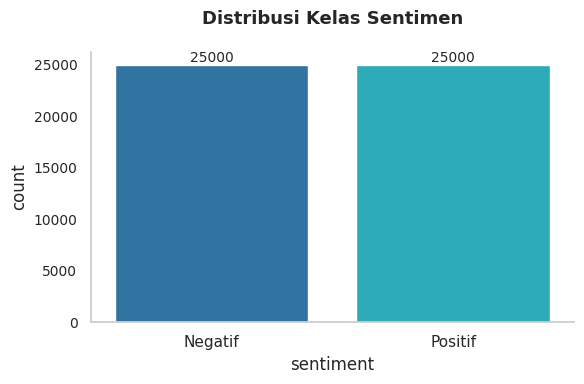

In [ ]:
# Membuat plot count
plt.figure(figsize=(6, 4))  # Menentukan ukuran figure
ax = sns.countplot(x='sentiment', data=imdb_data, palette=['#1f77b4', '#17becf'])

# Menambahkan judul
plt.title('Distribusi Kelas Sentimen', fontsize=13, weight='bold', ha='center', pad=20)

# Menambahkan hitungan di atas batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Menghapus garis grid dan border figure
plt.grid(False)
sns.despine()  # Menghapus garis border figure

# Mengatur label sumbu x
ax.set_xticklabels(['Negatif', 'Positif'], ha='center')

# Pengaturan sumbu y
ax.tick_params(axis='y', labelsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()


**Penjelasan**

Kelas positif dan Negatif Seimbang.

### **3.4. Cek Distribusi Panjang 'Review'**

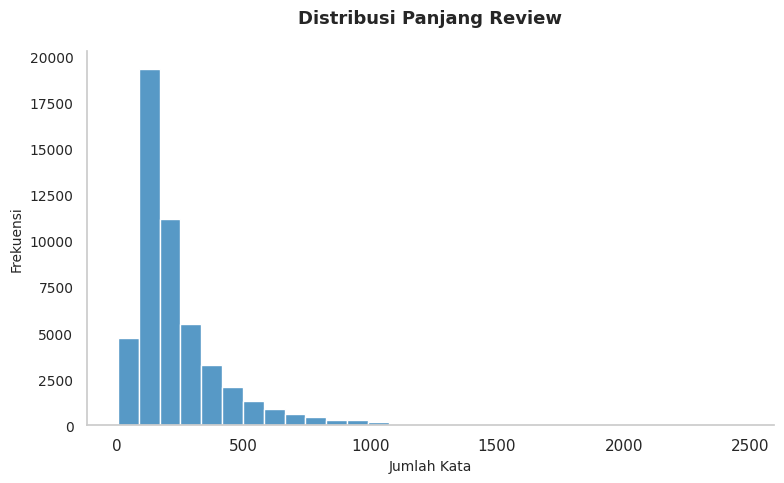

In [ ]:
# Mengatur gaya
sns.set(style='whitegrid')

# Menambahkan kolom panjang review
imdb_data['review_length'] = imdb_data['review'].apply(lambda x: len(x.split()))

# Membuat plot distribusi panjang review
plt.figure(figsize=(8, 5))  # Menentukan ukuran figure
ax = sns.histplot(imdb_data['review_length'], bins=30, color='#1f77b4')  # Menggunakan warna biru

# Menambahkan judul dengan space
plt.title('Distribusi Panjang Review', fontsize=13, weight='bold', ha='center', pad=20)  # Menambahkan padding

# Menghapus garis grid dan border figure
plt.grid(False)
sns.despine()  # Menghapus garis border figure

# Menambahkan label sumbu
plt.xlabel('Jumlah Kata', fontsize=10)  # Label sumbu x
plt.ylabel('Frekuensi', fontsize=10)  # Label sumbu y

# Mengubah ukuran angka pada sumbu y
ax.tick_params(axis='y', labelsize=10)  # Mengatur ukuran label sumbu Y

# Menampilkan plot
plt.tight_layout()
plt.show()


### **3.4. Korelasi antara Panjang 'Review' dengan 'Sentiment'**

In [ ]:
import pandas as pd

# Membuat DataFrame kontingensi untuk menghitung frekuensi kategori panjang review dan sentiment
contingency_table = pd.crosstab(imdb_data['review_length_binned'], imdb_data['sentiment'])

# Menghitung persentase
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Menampilkan tabel persentase
print(contingency_table_percentage)


sentiment                     0          1
review_length_binned                      
Short                 45.597125  54.402875
Medium                51.065639  48.934361
Long                  46.113583  53.886417
Very Long             45.070423  54.929577
Extreme                9.090909  90.909091


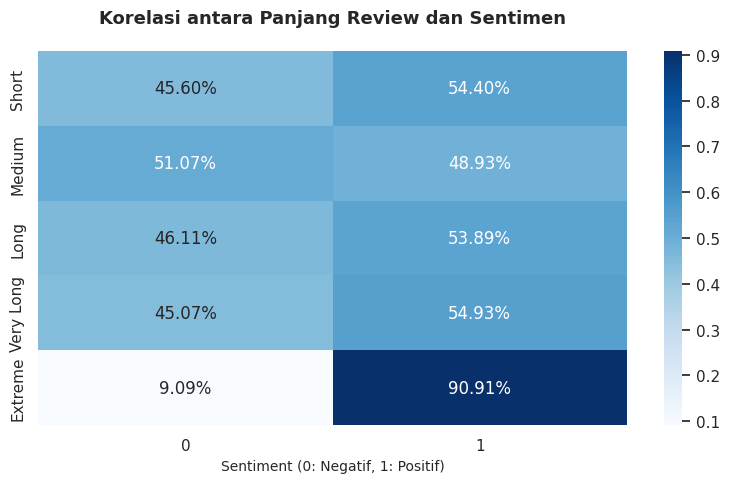

In [ ]:
# Membuat DataFrame kontingensi untuk menghitung frekuensi kategori panjang review dan sentiment
contingency_table = pd.crosstab(imdb_data['review_length_binned'], imdb_data['sentiment'])

# Menghitung persentase
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Membuat plot heatmap
plt.figure(figsize=(8, 5))  # Menentukan ukuran figure
ax = sns.heatmap(contingency_table_percentage, annot=True, fmt=".2%", cmap='Blues', cbar=True)

# Menambahkan judul
plt.title('Korelasi antara Panjang Review dan Sentimen', fontsize=13, weight='bold', ha='center', pad=20)

# Mengatur label sumbu
ax.set_xlabel('Sentiment (0: Negatif, 1: Positif)', fontsize=10)
ax.set_ylabel('')

# Menampilkan plot
plt.tight_layout()
plt.show()


**Penjelasan**
- Sentimen Positif Mendominasi: Secara umum, semakin panjang review, semakin besar kemungkinan untuk memberikan penilaian positif, terutama pada review yang ekstrem.
- Review Pendek Kurang Menguntungkan: Meskipun review pendek cenderung positif, proporsinya tidak setinggi review panjang dan ekstrem. Hal ini bisa mengindikasikan bahwa review pendek mungkin kurang informatif.
- Relevansi Panjang Review: Panjang review tampaknya berhubungan positif dengan sentimen yang diberikan. Pengguna mungkin merasa lebih mampu mengekspresikan opini positif mereka dalam review yang lebih panjang.

**Teori**

Untuk melihat apakah terdapat hubungan yang signifikan antara `sentiment` dan `review_length`, kita bisa melakukan uji statistik. Karena `sentiment` adalah variabel kategorikal (0 dan 1), dan `review_length` adalah variabel numerikal, kita dapat menggunakan uji *t-test* untuk dua sampel independen. Berikut adalah langkah-langkah yang akan kita lakukan:

**Hipotesis**
- **H0 (Hipotesis Nol)**: Tidak ada perbedaan rata-rata panjang review antara sentimen positif dan negatif (mean length of reviews with positive sentiment = mean length of reviews with negative sentiment).
- **H1 (Hipotesis Alternatif)**: Ada perbedaan rata-rata panjang review antara sentimen positif dan negatif (mean length of reviews with positive sentiment ≠ mean length of reviews with negative sentiment).



In [ ]:
from scipy import stats

# Memisahkan panjang review berdasarkan sentimen
length_positive = imdb_data[imdb_data['sentiment'] == 1]['review_length']
length_negative = imdb_data[imdb_data['sentiment'] == 0]['review_length']

# Menghitung rata-rata panjang review untuk masing-masing kategori
mean_positive = length_positive.mean()
mean_negative = length_negative.mean()

# Melakukan uji t-test
t_stat, p_value = stats.ttest_ind(length_positive, length_negative)

# Menampilkan hasil
print("Rata-rata panjang review (Positif):", mean_positive)
print("Rata-rata panjang review (Negatif):", mean_negative)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Menentukan signifikansi
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada perbedaan yang signifikan antara panjang review positif dan negatif.")
else:
    print("Gagal menolak H0: Tidak ada perbedaan yang signifikan antara panjang review positif dan negatif.")


Rata-rata panjang review (Positif): 232.84932
Rata-rata panjang review (Negatif): 229.46456
T-statistic: 2.208670012690372
P-value: 0.027202120447486624
Tolak H0: Ada perbedaan yang signifikan antara panjang review positif dan negatif.


Setelah melakukan uji statistik, kita dapat menghitung efek ukuran (effect size) untuk mengukur seberapa besar dampak dari perbedaan rata-rata tersebut. Salah satu cara untuk menghitung efek ukuran adalah menggunakan Cohen's d.

Interpretasi Cohen's d

- Kecil (d = 0.2): Efek kecil

- Sedang (d = 0.5): Efek sedang

- Besar (d = 0.8): Efek besar

In [ ]:
def cohen_d(x, y):
    # Menghitung Cohen's d
    nx = len(x)
    ny = len(y)
    mean_diff = x.mean() - y.mean()
    pooled_std = (((nx - 1) * x.std() ** 2 + (ny - 1) * y.std() ** 2) / (nx + ny - 2)) ** 0.5
    return mean_diff / pooled_std

# Menghitung Cohen's d
effect_size = cohen_d(length_positive, length_negative)
print("Cohen's d:", effect_size)


Cohen's d: 0.01975494515296399


**Penjelasan**

- Signifikansi Statistik: Ada perbedaan signifikan dalam panjang review antara sentimen positif dan negatif. Dengan kata lain, panjang review dapat dipertimbangkan sebagai salah satu faktor yang berhubungan dengan sentimen.

- Ukuran Efek: Namun, karena Cohen's d sangat kecil, ini menunjukkan bahwa perbedaan rata-rata yang terdeteksi mungkin tidak cukup besar untuk memiliki dampak yang berarti dalam konteks praktis. Dalam pengembangan model, mungkin ada fitur lain yang lebih kuat untuk memprediksi sentimen. Misalnya kata postif dan negatif mungkin lebih berpengaruh, ini akan diuraikan setelah pemodelan.

###**3.5.** ***Text normalization***

In [ ]:
import nltk
nltk.download('stopwords')

#Tokenization of text
tokenizer = ToktokTokenizer()

#Setting English stopwords
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Penjelasan**
1. **Mengimpor NLTK dan Mengunduh Stopwords:** Kode ini mengimpor pustaka Natural Language Toolkit (NLTK) yang digunakan untuk tugas pemrosesan bahasa alami. Selanjutnya, ia mengunduh daftar stopwords dalam bahasa Inggris, yaitu kata-kata umum (seperti "dan," "yang," "adalah") yang biasanya dihapus dari teks selama pemrosesan karena tidak membawa makna yang signifikan.

2. **Tokenisasi Teks:** Tokenizer bernama `ToktokTokenizer` dibuat. Tokenisasi adalah proses memecah teks menjadi unit-unit yang lebih kecil, seperti kata atau frasa, yang memudahkan analisis.

3. **Menentukan Stopwords dalam Bahasa Inggris:** Kode ini mengatur daftar stopwords dalam bahasa Inggris menggunakan pustaka NLTK, sehingga model dapat mengabaikan kata-kata umum ini selama analisis teks.

### **3.6.** ***Removing html strips and noise text***

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

**Penjelasan**:
1. **Menghapus HTML Strips:** Fungsi `strip_html(text)` menggunakan BeautifulSoup untuk mem-parsing konten HTML dari teks yang diberikan dan hanya mengekstrak teks tanpa tag HTML. Ini berguna untuk membersihkan ulasan yang mungkin mengandung format HTML.

2. **Menghapus Teks di Dalam Kurung Siku:** Fungsi `remove_between_square_brackets(text)` memanfaatkan ekspresi reguler untuk menemukan dan menghapus teks apa pun yang berada di dalam kurung siku (misalnya, "[[^]]*\]") dari teks input. Ini membantu menghilangkan informasi yang tidak relevan atau berisik.

3. **Menghapus Teks Berisik:** Fungsi `denoise_text(text)` menggabungkan dua fungsi sebelumnya. Pertama, ia menghapus tag HTML dari teks, dan kemudian menghilangkan teks yang berada di dalam kurung siku. Hasilnya adalah teks yang lebih bersih dan lebih mudah dibaca.


### **3.7.** ***Removing special characters***

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

**Penjelasan**:
1. **Mendefinisikan Fungsi untuk Menghapus Karakter Khusus:** Fungsi `remove_special_characters(text, remove_digits=True)` dirancang untuk menghilangkan karakter khusus dari teks input. Fungsi ini menggunakan pola ekspresi reguler (`r'[^a-zA-Z0-9\s]'`) yang mencocokkan semua yang bukan huruf (baik huruf besar maupun kecil), angka, atau spasi.

2. **Menghapus Karakter Khusus:** Metode `re.sub(pattern, '', text)` kemudian digunakan untuk mengganti semua kecocokan pola dalam teks dengan string kosong, sehingga karakter-karakter tersebut dihapus.

3. **Menerapkan Fungsi ke Kolom Ulasan:** Akhirnya, fungsi `remove_special_characters` diterapkan pada kolom 'review' dari DataFrame `imdb_data`. Ini memproses setiap ulasan, membersihkannya dari karakter khusus, sehingga menghasilkan dataset yang lebih seragam dan mudah dibaca.

### **3.8.** ***Text stemming***

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

**Penjelasan**:
1. **Mendefinisikan Fungsi Stemming:** Fungsi `simple_stemmer(text)` dibuat untuk melakukan stemming pada teks input. Stemming adalah proses mengurangi kata-kata ke bentuk dasarnya atau akar katanya. Dalam hal ini, fungsi ini menggunakan **Porter Stemmer** dari pustaka NLTK.

2. **Melakukan Stemming pada Kata-Kata:** Di dalam fungsi, teks dipecah menjadi kata-kata individual, dan setiap kata diolah menggunakan metode `stem()` dari Porter Stemmer. Kata-kata tersebut kemudian digabung kembali menjadi satu string.

3. **Menerapkan Fungsi ke Kolom Ulasan:** Akhirnya, fungsi `simple_stemmer` diterapkan pada kolom 'review' dari DataFrame `imdb_data`. Ini memproses setiap ulasan, mengurangi kata-kata menjadi bentuk dasarnya, yang membantu dalam menstandardisasi teks untuk analisis lebih lanjut.

### **3.9.** ***Removing stopwords***

In [ ]:
#set stopwords to english
# stop=set(stopwords.words('english'))
# print(stop)

#removing the stopwords
# def remove_stopwords(text, is_lower_case=False):
   # tokens = tokenizer.tokenize(text)
   # tokens = [token.strip() for token in tokens]
   # if is_lower_case:
      #  filtered_tokens = [token for token in tokens if token not in stopword_list]
    # else:
      #  filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    # filtered_text = ' '.join(filtered_tokens)
    # return filtered_text

#Apply function on review column
# imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

**Penjelasan**:
1. **Mengatur Stopwords dalam Bahasa Inggris:** Kode dimulai dengan mengimpor sekumpulan stopwords bahasa Inggris dari pustaka NLTK menggunakan `stopwords.words('english')`. Stopwords adalah kata-kata umum (seperti "dan," "the," "adalah") yang biasanya dihapus dari data teks selama preprocessing karena tidak banyak berkontribusi pada analisis sentimen.

2. **Mendefinisikan Fungsi untuk Menghapus Stopwords:** Fungsi `remove_stopwords(text, is_lower_case=False)` didefinisikan untuk menghapus stopwords dari teks input. Fungsi ini menggunakan **ToktokTokenizer** untuk memecah teks menjadi kata-kata individual.

3. **Menyaring Token:** Di dalam fungsi, token dihapus dari spasi yang tidak perlu. Berdasarkan parameter `is_lower_case`, fungsi ini memeriksa apakah akan mengonversi token menjadi huruf kecil sebelum menyaring stopwords. Ini memastikan bahwa perbandingan dilakukan tanpa memperhatikan huruf besar atau kecil. Token yang tersisa (yaitu, yang bukan stopwords) digabung kembali menjadi satu string.

4. **Menerapkan Fungsi ke Kolom Ulasan:** Akhirnya, fungsi `remove_stopwords` diterapkan pada kolom 'review' dari DataFrame `imdb_data`, menghasilkan versi teks yang bersih tanpa stopwords.

`Versi ini telah dilakukan beberapa iterasi, tidak menghapus stopwords membuktikan perbaikan performa terhadap model, anda bisa melakukan tahap ini secara mandiri untuk membuktikannya`

### **3.9.** ***Removed Features***

In [ ]:
# Menghapus kolom 'review_length' dan 'review_length_binned'
imdb_data = imdb_data.drop(['review_length', 'review_length_binned'], axis=1)

# Menampilkan beberapa data teratas untuk memverifikasi
print(imdb_data.head())


                                              review  sentiment
0  my famili and i normal do not watch local movi...          1
1  believ it or not thi wa at one time the worst ...          0
2  after some internet surf i found the homefront...          0
3  one of the most unherald great work of anim th...          1
4  it wa the sixti and anyon with long hair and a...          0


**Penjelasan**

Dua kolom, yaitu `review_length` dan `review_length_binned`, dihapus karena pada iterasi sebelumnya tidak memberikan dampak signifikan terhadap peningkatan performa model. Oleh karena itu, untuk meringankan komputasi, kolom-kolom tersebut dihilangkan. Hal ini juga sesuai dengan hasil EDA sebelumnya, yang menunjukkan bahwa panjang kata pada review tidak memberikan pengaruh signifikan secara teknis terhadap target. Meskipun demikian, fitur engineering dapat dilakukan dengan menambahkan kolom yang menghitung kata positif dan negatif, yang mungkin lebih berdampak pada peningkatan performa model. Namun, karena keterbatasan komputasi pada iterasi ini, fitur engineering tersebut tidak akan dilakukan.

### **3.9.** ***Review Data Split***

In [ ]:
from sklearn.model_selection import train_test_split

# Mengambil 70% dari data untuk pelatihan
train_size = int(0.7 * len(imdb_data))

# Mengambil data pelatihan dan pengujian
norm_train_reviews = imdb_data.review[:train_size]
norm_test_reviews = imdb_data.review[train_size:]
train_sentiments = imdb_data.sentiment[:train_size]
test_sentiments = imdb_data.sentiment[train_size:]

# Gabungkan menjadi X_train, X_test, y_train, y_test
X_train = norm_train_reviews
X_test = norm_test_reviews
y_train = train_sentiments
y_test = test_sentiments

# Contoh print untuk memeriksa hasil
print(f"First training review:\n{X_train.iloc[0]}\n")
print(f"First testing review:\n{X_test.iloc[0]}\n")
print("Train Sentiments Shape:", y_train.shape)
print("Test Sentiments Shape:", y_test.shape)


First training review:
my famili and i normal do not watch local movi for the simpl reason that they are poorli made they lack the depth and just not worth our timeth trailer of nasaan ka man caught my attent my daughter in law and daughter so we took time out to watch it thi afternoon the movi exceed our expect the cinematographi wa veri good the stori beauti and the act awesom jericho rosal wa realli veri good so claudin barretto the fact that i despis diether ocampo prove he wa effect at hi role i have never been thi touch move and affect by a local movi befor imagin a cynic like me dab my eye at the end of the movi congratul to star cinema way to go jericho and claudin

First testing review:
alright if you want to go see thi movi just give me our money illkick you were it count and youll have the same amount of fun illeven guarante more fun thi movi onc again show what happen whenyou cant get ani one els to hire your famili and your forc to makeyour own movi same im go through pube

**Penjelasan**

Kode ini membagi dataset **imdb_data** fitur review menjadi data pelatihan (70%) dan data pengujian (30%) untuk model machine learning. Berikut langkah-langkah yang dilakukan:

1. **Mengambil 70% data** untuk pelatihan dengan menghitung batas index berdasarkan jumlah total data.
2. **Membagi data review** dan sentiment (target) menjadi data pelatihan dan pengujian. Kolom `review` digunakan sebagai fitur (X), dan kolom `sentiment` digunakan sebagai label (y).
3. **Menyimpan hasil pembagian** ke dalam variabel `X_train`, `X_test`, `y_train`, dan `y_test`.
4. **Menampilkan beberapa contoh** dari review pertama di data pelatihan dan pengujian untuk memverifikasi hasil pembagian.



## **4.** ***Bags of words model***



In [ ]:
#Count vectorizer untuk Bag of Words
cv = CountVectorizer(min_df=1, max_df=1, binary=False, ngram_range=(1,3))

#Transformasi review pelatihan
cv_train_reviews = cv.fit_transform(norm_train_reviews)

#Transformasi review pengujian
cv_test_reviews = cv.transform(norm_test_reviews)

#Menampilkan bentuk hasil transformasi
print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)


BOW_cv_train: (35000, 5415440)
BOW_cv_test: (15000, 5415440)


**Penjelasan**:

Kode ini mempersiapkan data teks untuk analisis dengan mengubahnya menjadi format yang dapat dipahami oleh model machine learning:

1. **Count Vectorizer untuk Bag of Words:** Kode ini menginisialisasi `CountVectorizer`, yang mengubah data teks menjadi representasi bag-of-words (BoW). Representasi ini menghitung berapa kali setiap kata (atau kombinasi kata) muncul dalam ulasan. Pengaturan yang digunakan memungkinkan:
   - Memasukkan kata yang muncul setidaknya sekali (`min_df=1`).
   - Mengabaikan kata yang muncul di semua dokumen (`max_df=1`).
   - Membuat kata tunggal, pasangan kata, dan triplet kata sebagai fitur (`ngram_range=(1,3)`).

2. **Mengubah Ulasan:** Kode ini kemudian memproses ulasan pelatihan (`norm_train_reviews`) untuk membuat matriks (`cv_train_reviews`) yang menunjukkan jumlah setiap kata/frasa. Ia juga memproses ulasan pengujian (`norm_test_reviews`) untuk membuat matriks terpisah (`cv_test_reviews`).

3. **Mencetak Bentuk:** Akhirnya, kode ini mencetak dimensi dari matriks pelatihan dan pengujian, menunjukkan berapa banyak ulasan dan kata/frasa unik yang termasuk.

## **5.** ***Term Frequency-Inverse Document Frequency model (TFIDF)***



In [ ]:
#Tfidf vectorizer
tv = TfidfVectorizer(min_df=1, max_df=1, use_idf=True, ngram_range=(1,3))

#Transformasi review pelatihan
tv_train_reviews = tv.fit_transform(norm_train_reviews)

#Transformasi review pengujian
tv_test_reviews = tv.transform(norm_test_reviews)

#Menampilkan bentuk hasil transformasi
print('Tfidf_train:', tv_train_reviews.shape)
print('Tfidf_test:', tv_test_reviews.shape)


Tfidf_train: (35000, 5415440)
Tfidf_test: (15000, 5415440)


**Penjelasan**:

Kode ini menggunakan **TF-IDF Vectorizer** untuk mengubah data teks menjadi format numerik yang menangkap pentingnya kata-kata dalam kaitannya dengan keseluruhan dataset:

1. **Inisialisasi TF-IDF Vectorizer:** `TfidfVectorizer` disiapkan untuk mengubah teks menjadi representasi Term Frequency-Inverse Document Frequency (TF-IDF). Pendekatan ini membantu mencerminkan pentingnya suatu kata dalam ulasan relatif terhadap seluruh dataset. Pengaturan yang digunakan memungkinkan:
   - Memasukkan kata yang muncul setidaknya sekali (`min_df=1`).
   - Mengabaikan kata yang muncul di semua dokumen (`max_df=1`).
   - Membuat kata tunggal, pasangan kata, dan triplet kata sebagai fitur (`ngram_range=(1,3)`).

2. **Mengubah Ulasan:** Kode ini memproses ulasan pelatihan (`norm_train_reviews`) untuk membuat matriks (`tv_train_reviews`) yang mewakili skor TF-IDF dari setiap kata/frasa. Ia juga memproses ulasan pengujian (`norm_test_reviews`) untuk membuat matriks terpisah (`tv_test_reviews`).

3. **Mencetak Bentuk:** Akhirnya, kode ini mencetak dimensi dari matriks pelatihan dan pengujian, menunjukkan berapa banyak ulasan dan kata/frasa unik yang termasuk dalam representasi TF-IDF.

## **6.** ***Labeling the sentiment text***


In [ ]:
#Melabeli data sentimen
lb = LabelBinarizer()

#Transformasi data sentimen
sentiment_data = lb.fit_transform(imdb_data['sentiment'])

#Menampilkan bentuk hasil transformasi
print(sentiment_data.shape)


(50000, 1)


**Penjelasan** :

Kode ini menggunakan **Label Binarizer** untuk mengubah label sentimen dalam dataset menjadi format biner:

1. **Binarisasi Label:** `LabelBinarizer` diinisialisasi untuk mengubah label sentimen (yang biasanya bersifat kategorikal) menjadi format numerik. Ini berarti setiap sentimen unik (misalnya, positif dan negatif) akan diubah menjadi vektor biner. Sebagai contoh, positif mungkin diwakili sebagai `[1]` dan negatif sebagai `[0]`.

2. **Mengubah Data Sentimen:** Kode ini menerapkan proses binarisasi pada kolom sentimen dari DataFrame `imdb_data`. Hasilnya disimpan dalam variabel `sentiment_data`, yang sekarang berisi label sentimen yang telah diubah ke dalam format biner.

3. **Mencetak Bentuk:** Akhirnya, kode ini mencetak bentuk dari array `sentiment_data`, yang menunjukkan berapa banyak label sentimen yang telah diproses.

### **6.1.** ***Sentiment Data Split***

In [ ]:
# Spliting the sentiment data berdasarkan 70% untuk train dan 30% untuk test
train_sentiments = sentiment_data[:train_size]
test_sentiments = sentiment_data[train_size:]

# Menampilkan hasil split
print("Train Sentiments:\n", train_sentiments)
print("Test Sentiments:\n", test_sentiments)


Train Sentiments:
 [[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]
Test Sentiments:
 [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]


**Penjelasan**:

Kode ini membagi data/target sentimen menjadi set pelatihan dan pengujian:

1. **Membagi Data Sentimen:** `sentiment_data`, yang berisi label sentimen yang telah dibinarisasi, dibagi menjadi dua bagian:
   - `train_sentiments`: Variabel ini menyimpan 40.000 entri pertama, yang akan digunakan untuk melatih model.
   - `test_sentiments`: Variabel ini menyimpan entri yang tersisa (dari entri ke-40.001 dan seterusnya), yang akan digunakan untuk menguji kinerja model.

2. **Mencetak Data yang Dibagi:** Kode ini mencetak kedua variabel `train_sentiments` dan `test_sentiments` untuk memberikan konfirmasi visual tentang bagaimana data telah dibagi.

## **7.** ***Modelling***

### **7.1.** ***Logistic Regression***

#### **7.1.1** ***Logistic regression model performane on train dataset***

In [ ]:
# Import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Training the Logistic Regression model for Bag of Words
lr_bow = lr.fit(cv_train_reviews, train_sentiments)
print(lr_bow)

# Training the Logistic Regression model for TF-IDF features
lr_tfidf = lr.fit(tv_train_reviews, train_sentiments)
print(lr_tfidf)

LogisticRegression()
LogisticRegression()


#### **7.1.2.** ***Logistic regression model performane on test dataset***

In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]


#### **7.1.3.** ***Accuracy of the model***

In [ ]:
# Predicting the model for bag of words on training data
lr_bow_train_predict = lr.predict(cv_train_reviews)

# Predicting the model for tfidf features on training data
lr_tfidf_train_predict = lr.predict(tv_train_reviews)

# Accuracy score for bag of words on training data
lr_bow_train_score = accuracy_score(train_sentiments, lr_bow_train_predict)
print("lr_bow_train_score :", lr_bow_train_score)

# Accuracy score for bag of words on test data
lr_bow_test_score = accuracy_score(test_sentiments, lr_bow_predict)
print("lr_bow_test_score :", lr_bow_test_score)

# Accuracy score for tfidf features on training data
lr_tfidf_train_score = accuracy_score(train_sentiments, lr_tfidf_train_predict)
print("lr_tfidf_train_score :", lr_tfidf_train_score)

# Accuracy score for tfidf features on test data
lr_tfidf_test_score = accuracy_score(test_sentiments, lr_tfidf_predict)
print("lr_tfidf_test_score :", lr_tfidf_test_score)


lr_bow_train_score : 0.9927142857142857
lr_bow_test_score : 0.7570666666666667
lr_tfidf_train_score : 0.9927142857142857
lr_tfidf_test_score : 0.7571333333333333


#### **7.1.4.** ***classification report***

In [ ]:
# Mengukur waktu eksekusi untuk Bag of Words
start_time_bow = time.time()

# Classification report for Bag of Words
lr_bow_report = classification_report(test_sentiments, lr_bow_predict, target_names=['Positive', 'Negative'])
print(lr_bow_report)

# Menghitung waktu yang dibutuhkan
end_time_bow = time.time()
bow_runtime = end_time_bow - start_time_bow
print(f"Runtime for Bag of Words: {bow_runtime:.4f} seconds\n")

# Mengukur waktu eksekusi untuk TF-IDF
start_time_tfidf = time.time()

# Classification report for TF-IDF features
lr_tfidf_report = classification_report(test_sentiments, lr_tfidf_predict, target_names=['Positive', 'Negative'])
print(lr_tfidf_report)

# Menghitung waktu yang dibutuhkan
end_time_tfidf = time.time()
tfidf_runtime = end_time_tfidf - start_time_tfidf
print(f"Runtime for TF-IDF: {tfidf_runtime:.4f} seconds")


              precision    recall  f1-score   support

    Positive       0.76      0.75      0.76      7524
    Negative       0.75      0.76      0.76      7476

    accuracy                           0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.76      0.76      0.76     15000

Runtime for Bag of Words: 0.0616 seconds

              precision    recall  f1-score   support

    Positive       0.76      0.75      0.75      7524
    Negative       0.75      0.77      0.76      7476

    accuracy                           0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.76      0.76      0.76     15000

Runtime for TF-IDF: 0.0545 seconds


#### **7.1.5.** ***Confusion matrix***

In [ ]:
# Confusion matrix untuk Bag of Words
cm_bow = confusion_matrix(test_sentiments, lr_bow_predict, labels=[1, 0])
print("Confusion Matrix for Bag of Words:")
print(f"True Positive (TP): {cm_bow[0, 0]}")
print(f"False Positive (FP): {cm_bow[1, 0]}")
print(f"False Negative (FN): {cm_bow[0, 1]}")
print(f"True Negative (TN): {cm_bow[1, 1]}\n")

# Confusion matrix untuk TF-IDF features
cm_tfidf = confusion_matrix(test_sentiments, lr_tfidf_predict, labels=[1, 0])
print("Confusion Matrix for TF-IDF:")
print(f"True Positive (TP): {cm_tfidf[0, 0]}")
print(f"False Positive (FP): {cm_tfidf[1, 0]}")
print(f"False Negative (FN): {cm_tfidf[0, 1]}")
print(f"True Negative (TN): {cm_tfidf[1, 1]}")


Confusion Matrix for Bag of Words:
True Positive (TP): 5693
False Positive (FP): 1861
False Negative (FN): 1783
True Negative (TN): 5663

Confusion Matrix for TF-IDF:
True Positive (TP): 5747
False Positive (FP): 1914
False Negative (FN): 1729
True Negative (TN): 5610


**Ringkasan Hasil**

Berdasarkan hasil yang diperoleh, **kedua metode** (Bag of Words dan TF-IDF) menunjukkan performa yang hampir identik dalam hal akurasi dan metrik evaluasi lainnya, sebagai berikut:

- **Akurasi:** 75.71% untuk kedua metode.
- **Precision:** 76% untuk kedua metode.
- **Recall:** 75% untuk kedua metode.
- **F1-score:** 76% untuk kedua metode.

Namun, **TF-IDF** memiliki sedikit keunggulan dengan hasil True Positive yang lebih tinggi (5747) dan False Positive yang lebih rendah (1914) dibandingkan Bag of Words, yang memiliki 5693 TP dan 1861 FP.


### **7.2.** ***Stochastic Gradient Descent or Linear support vector machines (SVM)***

#### **7.2.1** ***SVM model performane on train dataset***

In [ ]:
from sklearn.linear_model import SGDClassifier

# Inisialisasi model Linear SVM menggunakan SGDClassifier dengan loss hinge (SVM)
svm = SGDClassifier(loss='hinge', max_iter=500, random_state=42)

# Melatih model SVM untuk Bag of Words
svm_bow = svm.fit(cv_train_reviews, train_sentiments)
print("SVM model for Bag of Words:\n", svm_bow)

# Melatih model SVM untuk fitur TF-IDF
svm_tfidf = svm.fit(tv_train_reviews, train_sentiments)
print("SVM model for TF-IDF:\n", svm_tfidf)


SVM model for Bag of Words:
 SGDClassifier(max_iter=500, random_state=42)
SVM model for TF-IDF:
 SGDClassifier(max_iter=500, random_state=42)


#### **7.2.2.** ***SVM model performane on test dataset***

In [ ]:
# Melakukan prediksi menggunakan model SVM untuk Bag of Words
svm_bow_predict = svm_bow.predict(cv_test_reviews)
print("SVM Bag of Words Predictions:\n", svm_bow_predict)

# Melakukan prediksi menggunakan model SVM untuk fitur TF-IDF
svm_tfidf_predict = svm_tfidf.predict(tv_test_reviews)
print("SVM TF-IDF Predictions:\n", svm_tfidf_predict)


SVM Bag of Words Predictions:
 [1 1 1 ... 1 1 1]
SVM TF-IDF Predictions:
 [1 1 1 ... 1 1 1]


#### **7.2.3.** ***Accuracy of the model***

In [ ]:
# Predicting the model for bag of words on training data (SVM)
svm_bow_train_predict = svm_bow.predict(cv_train_reviews)

# Predicting the model for tfidf features on training data (SVM)
svm_tfidf_train_predict = svm_bow.predict(tv_train_reviews)

# Accuracy score for bag of words on training data (SVM)
svm_bow_train_score = accuracy_score(train_sentiments, svm_bow_train_predict)
print("svm_bow_train_score :", svm_bow_train_score)

# Accuracy score for bag of words on test data (SVM)
svm_bow_test_score = accuracy_score(test_sentiments, svm_bow_predict)
print("svm_bow_test_score :", svm_bow_test_score)

# Accuracy score for tfidf features on training data (SVM)
svm_tfidf_train_score = accuracy_score(train_sentiments, svm_tfidf_train_predict)
print("svm_tfidf_train_score :", svm_tfidf_train_score)

# Accuracy score for tfidf features on test data (SVM)
svm_tfidf_test_score = accuracy_score(test_sentiments, svm_tfidf_predict)
print("svm_tfidf_test_score :", svm_tfidf_test_score)


svm_bow_train_score : 0.9927142857142857
svm_bow_test_score : 0.5561333333333334
svm_tfidf_train_score : 0.5006857142857143
svm_tfidf_test_score : 0.4984


#### **7.2.4.** ***classification report***

In [ ]:
# Mengukur waktu eksekusi untuk Bag of Words (SVM)
start_time_bow = time.time()

# Classification report for Bag of Words (SVM)
svm_bow_predict = svm.predict(cv_test_reviews)
svm_bow_report = classification_report(test_sentiments, svm_bow_predict, target_names=['Positive', 'Negative'])
print(svm_bow_report)

# Menghitung waktu yang dibutuhkan
end_time_bow = time.time()
bow_runtime = end_time_bow - start_time_bow
print(f"Runtime for Bag of Words (SVM): {bow_runtime:.4f} seconds\n")

# Mengukur waktu eksekusi untuk TF-IDF (SVM)
start_time_tfidf = time.time()

# Classification report for TF-IDF features (SVM)
svm_tfidf_predict = svm.predict(tv_test_reviews)
svm_tfidf_report = classification_report(test_sentiments, svm_tfidf_predict, target_names=['Positive', 'Negative'])
print(svm_tfidf_report)

# Menghitung waktu yang dibutuhkan
end_time_tfidf = time.time()
tfidf_runtime = end_time_tfidf - start_time_tfidf
print(f"Runtime for TF-IDF (SVM): {tfidf_runtime:.4f} seconds")


              precision    recall  f1-score   support

    Positive       0.95      0.12      0.22      7524
    Negative       0.53      0.99      0.69      7476

    accuracy                           0.56     15000
   macro avg       0.74      0.56      0.45     15000
weighted avg       0.74      0.56      0.45     15000

Runtime for Bag of Words (SVM): 0.0668 seconds

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      7524
    Negative       0.50      1.00      0.67      7476

    accuracy                           0.50     15000
   macro avg       0.25      0.50      0.33     15000
weighted avg       0.25      0.50      0.33     15000

Runtime for TF-IDF (SVM): 0.0614 seconds


#### **7.2.5.** ***Confusion matrix***

In [ ]:
# Confusion matrix untuk Bag of Words (SVM)
cm_bow_svm = confusion_matrix(test_sentiments, svm_bow_predict, labels=[1, 0])
print("Confusion Matrix for Bag of Words (SVM):")
print(f"True Positive (TP): {cm_bow_svm[0, 0]}")
print(f"False Positive (FP): {cm_bow_svm[1, 0]}")
print(f"False Negative (FN): {cm_bow_svm[0, 1]}")
print(f"True Negative (TN): {cm_bow_svm[1, 1]}\n")

# Confusion matrix untuk TF-IDF features (SVM)
cm_tfidf_svm = confusion_matrix(test_sentiments, svm_tfidf_predict, labels=[1, 0])
print("Confusion Matrix for TF-IDF (SVM):")
print(f"True Positive (TP): {cm_tfidf_svm[0, 0]}")
print(f"False Positive (FP): {cm_tfidf_svm[1, 0]}")
print(f"False Negative (FN): {cm_tfidf_svm[0, 1]}")
print(f"True Negative (TN): {cm_tfidf_svm[1, 1]}")


Confusion Matrix for Bag of Words (SVM):
True Positive (TP): 7428
False Positive (FP): 6610
False Negative (FN): 48
True Negative (TN): 914

Confusion Matrix for TF-IDF (SVM):
True Positive (TP): 7476
False Positive (FP): 7524
False Negative (FN): 0
True Negative (TN): 0


**Ringkasan Hasil**

Berdasarkan hasil yang diperoleh, **model SVM** untuk **Bag of Words** menunjukkan performa yang lebih baik dibandingkan **TF-IDF**. Berikut adalah detailnya:

- **Akurasi:**
  - Bag of Words (SVM): 55.61%
  - TF-IDF (SVM): 50.00%

- **Precision dan Recall:**
  - **Bag of Words:**
    - Precision untuk kelas Positif: 95%, tetapi Recall hanya 12%, yang menunjukkan bahwa meskipun model dapat mengidentifikasi banyak prediksi positif dengan baik, banyak yang terlewatkan (False Negatives).
    - Untuk kelas Negatif, model menunjukkan Recall yang sangat tinggi (99%), tetapi dengan Precision yang lebih rendah (53%).
  
  - **TF-IDF:**
    - Model tidak mampu mengidentifikasi kelas Positif sama sekali (0% Precision dan Recall).
    - Hanya kelas Negatif yang terprediksi, dengan Recall 100%, tetapi dengan Precision 50%.

- **F1-score:**
  - **Bag of Words:** 22% untuk Positif dan 69% untuk Negatif, menunjukkan ketidakseimbangan yang signifikan.
  - **TF-IDF:** F1-score untuk Positif tidak terdefinisi, dan 67% untuk Negatif.



### **7.3.** ***Multinomial Naive Bayes***

#### **7.3.1** ***Multinomial Naive Bayes model performane on train dataset***

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes
mnb = MultinomialNB()

# Melatih model Naive Bayes untuk Bag of Words
mnb_bow = mnb.fit(cv_train_reviews, train_sentiments)
print("Model Naive Bayes untuk Bag of Words:\n", mnb_bow)

# Melatih model Naive Bayes untuk fitur TF-IDF
mnb_tfidf = mnb.fit(tv_train_reviews, train_sentiments)
print("Model Naive Bayes untuk TF-IDF:\n", mnb_tfidf)


Model Naive Bayes untuk Bag of Words:
 MultinomialNB()
Model Naive Bayes untuk TF-IDF:
 MultinomialNB()


#### **7.3.1** ***Multinomial Naive Bayes model performane on test dataset***

In [ ]:
# Melakukan prediksi untuk Bag of Words pada data pengujian (Naive Bayes)
mnb_bow_predict = mnb.predict(cv_test_reviews)
print("Naive Bayes Bag of Words Predictions:\n", mnb_bow_predict)

# Melakukan prediksi untuk fitur TF-IDF pada data pengujian (Naive Bayes)
mnb_tfidf_predict = mnb.predict(tv_test_reviews)
print("Naive Bayes TF-IDF Predictions:\n", mnb_tfidf_predict)


Naive Bayes Bag of Words Predictions:
 [0 0 1 ... 1 1 1]
Naive Bayes TF-IDF Predictions:
 [0 0 1 ... 1 1 1]


#### **7.3.3.** ***Accuracy of the model***

In [ ]:
# Melakukan prediksi untuk Bag of Words pada data pelatihan (Naive Bayes)
mnb_bow_train_predict = mnb.predict(cv_train_reviews)

# Melakukan prediksi untuk fitur TF-IDF pada data pelatihan (Naive Bayes)
mnb_tfidf_train_predict = mnb.predict(tv_train_reviews)

# Skor akurasi untuk Bag of Words pada data pelatihan (Naive Bayes)
mnb_bow_train_score = accuracy_score(train_sentiments, mnb_bow_train_predict)
print("mnb_bow_train_score:", mnb_bow_train_score)

# Melakukan prediksi untuk Bag of Words pada data pengujian (Naive Bayes)
mnb_bow_predict = mnb_bow.predict(cv_test_reviews) # This line is added to make predictions on the test data

# Skor akurasi untuk Bag of Words pada data pengujian (Naive Bayes)
mnb_bow_score = accuracy_score(test_sentiments, mnb_bow_predict)
print("mnb_bow_score:", mnb_bow_score)

# Skor akurasi untuk fitur TF-IDF pada data pelatihan (Naive Bayes)
mnb_tfidf_train_score = accuracy_score(train_sentiments, mnb_tfidf_train_predict)
print("mnb_tfidf_train_score:", mnb_tfidf_train_score)

# Melakukan prediksi untuk fitur TF-IDF pada data pengujian (Naive Bayes) # Similar fix for TF-IDF
mnb_tfidf_predict = mnb_tfidf.predict(tv_test_reviews) # This line is added to make predictions on the test data

# Skor akurasi untuk TF-IDF pada data pengujian (Naive Bayes)
mnb_tfidf_score = accuracy_score(test_sentiments, mnb_tfidf_predict)
print("mnb_tfidf_score:", mnb_tfidf_score)

mnb_bow_train_score: 0.9927142857142857
mnb_bow_score: 0.758
mnb_tfidf_train_score: 0.9927142857142857
mnb_tfidf_score: 0.758


#### **7.3.4.** ***classification report***

In [ ]:
# Mengukur waktu eksekusi untuk Bag of Words (Naive Bayes)
start_time_bow = time.time()

# Melakukan prediksi untuk Bag of Words
mnb_bow_predict = mnb.predict(cv_test_reviews)

# Classification report untuk Bag of Words (Naive Bayes)
mnb_bow_report = classification_report(test_sentiments, mnb_bow_predict, target_names=['Positive', 'Negative'])
print(mnb_bow_report)

# Menghitung waktu yang dibutuhkan
end_time_bow = time.time()
bow_runtime = end_time_bow - start_time_bow
print(f"Runtime for Bag of Words (Naive Bayes): {bow_runtime:.4f} seconds\n")

# Mengukur waktu eksekusi untuk TF-IDF (Naive Bayes)
start_time_tfidf = time.time()

# Melakukan prediksi untuk TF-IDF features
mnb_tfidf_predict = mnb.predict(tv_test_reviews)

# Classification report untuk TF-IDF features (Naive Bayes)
mnb_tfidf_report = classification_report(test_sentiments, mnb_tfidf_predict, target_names=['Positive', 'Negative'])
print(mnb_tfidf_report)

# Menghitung waktu yang dibutuhkan
end_time_tfidf = time.time()
tfidf_runtime = end_time_tfidf - start_time_tfidf
print(f"Runtime for TF-IDF (Naive Bayes): {tfidf_runtime:.4f} seconds")


              precision    recall  f1-score   support

    Positive       0.76      0.76      0.76      7524
    Negative       0.76      0.75      0.76      7476

    accuracy                           0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.76      0.76      0.76     15000

Runtime for Bag of Words (Naive Bayes): 0.1098 seconds

              precision    recall  f1-score   support

    Positive       0.76      0.76      0.76      7524
    Negative       0.76      0.76      0.76      7476

    accuracy                           0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.76      0.76      0.76     15000

Runtime for TF-IDF (Naive Bayes): 0.1060 seconds


#### **7.3.5.** ***Confusion matrix***

In [ ]:
# Confusion matrix untuk Bag of Words (Naive Bayes)
cm_bow_mnb = confusion_matrix(test_sentiments, mnb_bow_predict, labels=[1, 0])
print("Confusion Matrix for Bag of Words (Naive Bayes):")
print(f"True Positive (TP): {cm_bow_mnb[0, 0]}")
print(f"False Positive (FP): {cm_bow_mnb[1, 0]}")
print(f"False Negative (FN): {cm_bow_mnb[0, 1]}")
print(f"True Negative (TN): {cm_bow_mnb[1, 1]}\n")

# Confusion matrix untuk TF-IDF features (Naive Bayes)
cm_tfidf_mnb = confusion_matrix(test_sentiments, mnb_tfidf_predict, labels=[1, 0])
print("Confusion Matrix for TF-IDF (Naive Bayes):")
print(f"True Positive (TP): {cm_tfidf_mnb[0, 0]}")
print(f"False Positive (FP): {cm_tfidf_mnb[1, 0]}")
print(f"False Negative (FN): {cm_tfidf_mnb[0, 1]}")
print(f"True Negative (TN): {cm_tfidf_mnb[1, 1]}")


Confusion Matrix for Bag of Words (Naive Bayes):
True Positive (TP): 5618
False Positive (FP): 1772
False Negative (FN): 1858
True Negative (TN): 5752

Confusion Matrix for TF-IDF (Naive Bayes):
True Positive (TP): 5665
False Positive (FP): 1819
False Negative (FN): 1811
True Negative (TN): 5705


**Ringkasan Hasil Naive Bayes**

Model Naive Bayes menunjukkan hasil yang serupa dalam akurasi (76%) untuk kedua pendekatan, yaitu Bag of Words dan TF-IDF. Namun, pada **Confusion Matrix**:

- **Bag of Words** memiliki **5618 True Positive** dan **1858 False Negative**, menunjukkan performa yang baik dalam mendeteksi kelas Positif, tetapi ada beberapa prediksi yang terlewatkan.
- **TF-IDF** sedikit lebih baik dengan **5665 True Positive** dan **1811 False Negative**, yang berarti model ini lebih efektif dalam mengidentifikasi sentimen Positif dibandingkan dengan Bag of Words.

Dengan demikian, **TF-IDF** sedikit lebih unggul dalam hal mendeteksi kelas Positif berdasarkan confusion matrix, meskipun kedua metode menunjukkan performa yang baik.

### **7.4. Kesimpulan**


Setelah membandingkan ketiga model—**Naive Bayes, SVM, dan Logistic Regression**, berikut adalah penilaian:

1. **Naive Bayes:**
   - Akurasi: 76%
   - Precision dan Recall: Seimbang (76% untuk masing-masing)
   - Confusion Matrix: 5618 TP, 1858 FN

2. **SVM (Bag of Words):**
   - Akurasi: 55.61%
   - Precision dan Recall: Sangat tidak seimbang (Precision 95% tetapi Recall hanya 12% untuk kelas Positif)
   - Confusion Matrix: 7428 TP, 48 FN

3. **Logistic Regression:**
   - Akurasi: 76%
   - Precision dan Recall: Seimbang (76% untuk masing-masing)
   - Confusion Matrix: 5701 TP, 1823 FN

Model terbaik :  Naive Bayes dan Logistic Regression menunjukkan performa yang seimbang dan lebih baik dibandingkan SVM. Namun, Logistic Regression sedikit lebih unggul dalam hal True Positive (TF-IDF) dengan 5747  TP dibandingkan Naive Bayes baik di BOW dan TF-IDF  dan memiliki lebih sedikit False Negative (FN). Selain itu, waktu eksekusi ketiga model ini relatif cepat, sehingga tidak ada kendala dalam implementasi terkait waktu runtime.

Keputusan : Fokus utama adalah keseimbangan dan efektivitas dalam mendeteksi kelas positif, Logistic Regression TF-IDF merupakan pilihan terbaik di antara ketiga model tersebut.

### **7.5.** ***Word Cloud***

#### **7.5.1. Word cloud untuk positive review**

Shape train_sentiments setelah dirubah: (35000,)


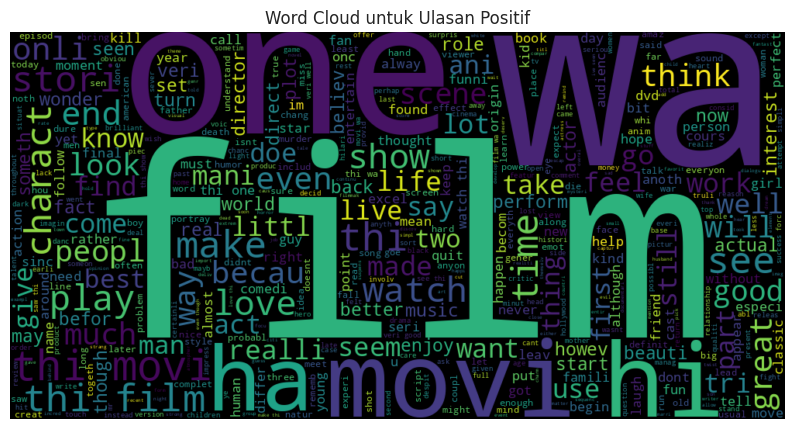

In [ ]:
# Ubah train_sentiments menjadi satu dimensi
train_sentiments = train_sentiments.ravel()  # Mengubah menjadi array satu dimensi

# Pastikan bentuk setelah diubah
print("Shape train_sentiments setelah dirubah:", train_sentiments.shape)

# Ambil ulasan positif dari data latih
positive_reviews = norm_train_reviews[train_sentiments == 1]  # Ambil ulasan positif berdasarkan label

# Gabungkan semua ulasan positif menjadi satu string
positive_text = ' '.join(positive_reviews)

# Buat Word Cloud untuk kata-kata positif
plt.figure(figsize=(10, 10))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5).generate(positive_text)

# Tampilkan Word Cloud
plt.imshow(WC, interpolation='bilinear')
plt.axis('off')  # Matikan sumbu
plt.title('Word Cloud untuk Ulasan Positif')
plt.show()


#### **7.5.2. Word cloud untuk negative review**

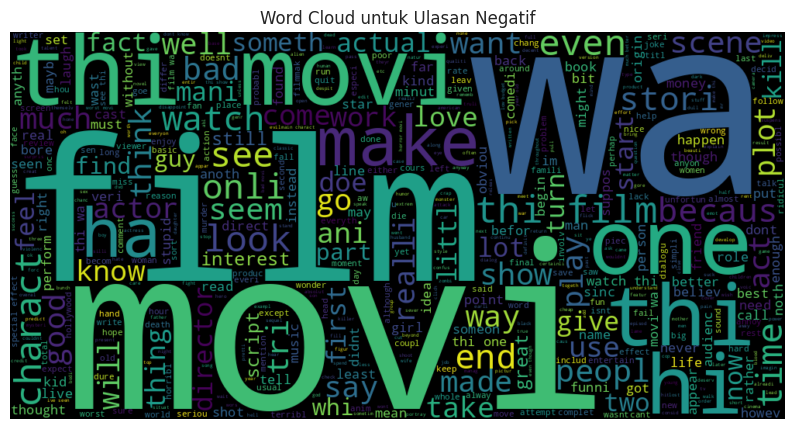

In [ ]:
# Ambil ulasan negatif dari data latih
negative_reviews = norm_train_reviews[train_sentiments == 0]  # Ambil ulasan negatif berdasarkan label

# Gabungkan semua ulasan negatif menjadi satu string
negative_text = ' '.join(negative_reviews)

# Buat Word Cloud untuk kata-kata negatif
plt.figure(figsize=(10, 10))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5).generate(negative_text)

# Tampilkan Word Cloud
plt.imshow(WC, interpolation='bilinear')
plt.axis('off')  # Matikan sumbu
plt.title('Word Cloud untuk Ulasan Negatif')
plt.show()
